# Support Vector Machines

A [**Support Vector Machine**](https://link.springer.com/article/10.1007/BF00994018) (SVM) is a powerful and versatile algorithm, capable of **performing linear and nonlinear classification, regression, and even outlier detection**. SVMs are particularly well suited for classification of **complex small-medium-sized** datasets.

## Optimal Margin

Imagine we have a dataset of training points, where each point is in one of two classes:

$\displaystyle L = \{x_i, y_i\} \quad \text{where} \quad x_i \in \mathbb{R}^D \quad \text{and} \quad y_i \in \{-1, 1\} \quad i=1,..,m$

We assume the data is linearly separable, meaning that there exists a hyperplane that separates the two classes. Mathematically, the hyperplane $H$ can be described by the equation:

$\displaystyle  H = \left\{ x : w^Tx+b=0 \right\} $

where $w$ is the normal vector to the hyperplane and $b$ is the bias term. We can write a classifier as:

$\displaystyle h_{w,b}(x) = g(w^tx+b)$

where $g$ is the sign function: $g(z) = 1$ if $z \geq 0$ and $g(z) = -1$ otherwise. 

Differently from the linear model discussion, here we use the notion $(w,b)$ instead of $\theta$ to explicitly treat the intercept term separately from the other parameters.

Consider a point far from the hyperplane, in that case the classifier will be very confident about its classification. On the other hand, a point close to the hyperplane will be classified with less confidence. So, we can define the **margin**  as the **distance of a point from the hyperplane**:

![](images/margins.png)

How we can calculate the margin? Consider some point $(x, y)$ and let $d$ the vector from $H$ to the point:

![](images/distance.png)

we can express the distance (margin) as the length (norm) of the vector $d$ and this vector is equal to the difference between the point $x$ and the projection of $x^p$ onto the hyperplane $H$:

$\displaystyle |d| = \sqrt{d^Td}$

$\displaystyle d = x - x^p$

however, since $d$ is parallel to the normal vector $w$, there exists a scalar $\alpha$ such that 

$\displaystyle d = \alpha w$ 

moreover, $x^p$ is on the hyperplane, so $w^Tx^p+b=0$. Then, composing those expressions we have:

$\displaystyle w^T(x-\alpha w)+b=0$

and we can solve for $\alpha$:

$\displaystyle \alpha = \frac{w^Tx+b}{w^tw}$

and this allows us to express the distance as:

$\displaystyle |d| = \sqrt{d^Td} = \sqrt{\alpha^2 w^Tw} = \sqrt{\left(\frac{w^Tx+b}{w^Tw}\right)^2 w^T w} = \frac{|w^Tx+b|}{\sqrt{w^Tw}} = \frac{|w^Tx+b|}{|w|}$

So we can define the margin $\gamma^{(i)}$ for a point $x^{(i)}$ as

$\displaystyle \gamma^{(i)}(w,b) = \frac{|w^Tx^{(i)}+b|}{|w|}$

**A large value of the margin represent a confident and correct prediction**.

Notice that the margin is invariant to the scale of the parameters $w$ and $b$, because we can multiply both by a constant and the margin will remain the same.

Considering all the example in the training set $L$, we can define the **margin of the hyperplane** as the smallest of the margins on all the points:

$\displaystyle \gamma (w,b) = \min_{i=1,...,m} \gamma^{(i)}(w,b)$

We can have **many possible hyperplanes that could separate the classes**. The goal of the SVM is to find the hyperplane $(w,b)$ that maximizes the margin (**maximum margin hyperplane**), since this would reflect a very confident set of predictions and give us a classifier that separates positive and negative training example with a large gap (margin):

![](images/maximum-margin-hyperplane.png)

So we can pose the following optimization problem: the objective is to maximize the margin, subject to the constraint that all points are correctly classified (lie on the correct side of the hyperplane). This can be expressed as:

$\displaystyle \Bigg \{ \begin{matrix} \max_{w,b} \gamma(w,b) \hspace{130 pt}   \\
\text{s.t.} \quad y^{(i)}(w^Tx^{(i)}+b) \geq 0 \quad \text{for} \quad i=1,...,m \end{matrix}$

Plugging the definition of the margin, we have:

$\displaystyle \max_{w,b} \min_{i=1,...,m} \gamma^{(i)}(w,b) = \max_{w,b} \frac{1}{|w|} \min_{i=1,...,m} |w^Tx^{(i)}+b|$

Because the hyperplane is invariant to the scale of the parameters, we can fix the scale of $(w,b)$ anyway we want, se we can be clever an choose it such that:

$\displaystyle \min_{i=1,...,m} |w^Tx^{(i)}+b| = 1$

then the objective becomes:

$\displaystyle \max_{w,b} \frac{1}{|w|} \min_{i=1,...,m} |w^Tx^{(i)}+b| = \max_{w,b} \frac{1}{|w|} = \min_{w,b} |w| = \min_{w,b} w^Tw$ 

and the constraint become:

$\displaystyle \text{s.t.} \quad y^{(i)}(w^Tx^{(i)}+b) \geq 0 \quad \text{for} \quad i=1,...,m$

$\displaystyle \quad \quad \min_{i=1,...,m} |w^Tx^{(i)}+b| = 1$

The two constraints can be combined into a single one e the final optimization problem becomes:

$\displaystyle \Bigg \{ \begin{matrix} \min_{w,b} w^Tw \hspace{140 pt}   \\
\text{s.t.} \quad y^{(i)}(w^Tx^{(i)}+b) \geq 1 \quad \text{for} \quad i=1,...,m \end{matrix}$

For the optimal (w,b) pair, some point will have a margin of exactly 1, and are called **support vectors**. They are special because define the maximum margin of the hyperplane to the data set and they therefore **determine the shape of the hyperplane**. If we were to move one of them and retrain the SVM, the resulting hyperplane would change. The opposite is the case for non-support vectors (provided we don't move them too much, or they would turn into support vectors themselves).

This problem is an optimization problem with a quadratic objective function and linear constraints. In general, an optimization problem can be written in the following terms:

$\displaystyle \Bigg \{ \begin{matrix} \min_{x} f(x) \hspace{100 pt}   \\
\text{s.t.} \quad g_i(x) \leq 0 \quad \text{for} \quad i=1,...,k \\
\hspace{15 pt} \quad h_i(x) = 0 \quad \text{for} \quad i=1,...,l \end{matrix}$

where:

- $f(x)$ is the **objective function**, 
- $g_i(x)$ are $k$ **inequality constraints**
- $h_i(x)$ are $l$ **equality constraints** 

## Lagrangian method

We can consider first the simple problem with only one equality constraint: 

$\displaystyle \Bigg \{ \begin{matrix} \min_{x} f(x) \quad \quad  \\
\text{s.t.} \quad h(x) = 0 \end{matrix}$

We can solve this problem using the **Lagrange method**. The idea is to transform the problem into a new problem, where the constraints are incorporated into the objective function. In order to get some intuitions about how it works, we can consider the contour of the objective and the equality constrain functions. If we have a function with only two dimensions $x = (x_1, x_2)$, we can drawn on the features plane, several regions where the function holds the same value. These are called level curves and at various points along these curves (just as the steepest hike is always perpendicular to a trail) the gradient is always perpendicular to the level curves. For example, consider the following contour for the objective function $f(x)$:

![](images/contour-objective-function.png)

Now we can have a similar map for the equality constrain function $h(x)$:

![](images/contour-equality-constrain.png)

However, we are not interested in the whole constraint function. We are only interested in points where the constraint is satisfied (i.e. $h=0$). If would be great if the constraint passed through the maximum of $f$, because then we could just take that maximum as the answer. Unfortunately, the constraint in general is well off to the side. That means we'll have to compromise. The idea is that we can keep going to lower and lower contours of $f$ until we get one point $(\hat{x_1}, \hat{x_2})$ tha touch the constraint, like this:

![](images/contour.png)

At the point $(\hat{x_1}, \hat{x_2})$ we have the biggest value of the objective that touches the constraint. Everything outside that contour is smaller, and so can't be the answer. Everything inside the contour doesn't meet the constraint. This point is the answer to our question, but how do we identify it? After all, we don't know exactly what contour we're working with here. We're just saying that eventually there's some contour that does this. However, in this point the contour of the objective and the contour of the constraint are parallel to each other. To see why, consider that if the constraint line is not tangent to the objective line, then it would have to cross it. By traveling a little bit along the constraint line in one direction or the other, we could find another point $(\hat{x_1} + \delta, \hat{x_2} + \delta)$ that has a better objective value than $(\hat{x_1}, \hat{x_2})$, which is not possible by definition. Further, because gradients are always perpendicular to contours, $f$ and $h$ have gradients that point in the same direction at the point $(\hat{x_1}, \hat{x_2}).

Mathematically, we can write the condition that the gradient of the objective function is parallel to the gradient of the constraint function as:

$\displaystyle \nabla f(x) = -\beta \nabla h(x)$

where $\beta$ is a scalar needed because even if the two gradient are parallel, they might not have the same length, so there must be some factor allowing to transform one in the other. We can write this condition equivalently:

$\displaystyle \nabla f(x) + \beta \nabla h(x) = 0$

and we can define a new function called the **Lagrangian** that combines the objective function and the constraint function:

$\displaystyle \mathcal{L}(x,\beta) = f(x) + \beta h(x)$

and the condition to find the minimum of the objective function under the constraint becomes the condition to find the minimum of the Lagrangian:

$\displaystyle \nabla \mathcal{L}(x,\beta) = 0$

As an example, we can consider the following optimization problem:

$\displaystyle \Bigg \{ \begin{matrix} \min_{x_1,x_2} f(x_1,x_2) = x_1^2 + x_2^2 \quad \quad \\
\text{s.t.} \enspace h(x_1,x_2) = x_1 + x_2 - 1 = 0 \end{matrix}$

We can visualize the objective function and the constraint using contour plot. Moreover, the gradient of the function can be visualized as a vector field:

In [1]:
import numpy as np

x1 = np.linspace(-1, 1, 20)
x2 = np.linspace(-1, 1, 20)

X1, X2 = np.meshgrid(x1, x2)

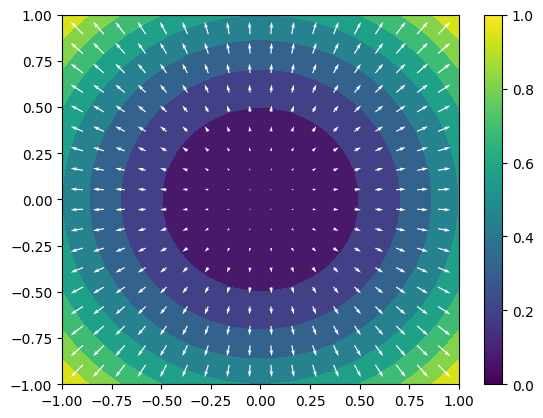

In [2]:
import matplotlib.pyplot as plt

F = X1**2 + X2**2

UF = 2*X1
VF = 2*X2

plt.contourf(X1, X2, F)
plt.quiver(X1, X2, UF, VF, color='w', headlength=5)
plt.colorbar()

plt.show()

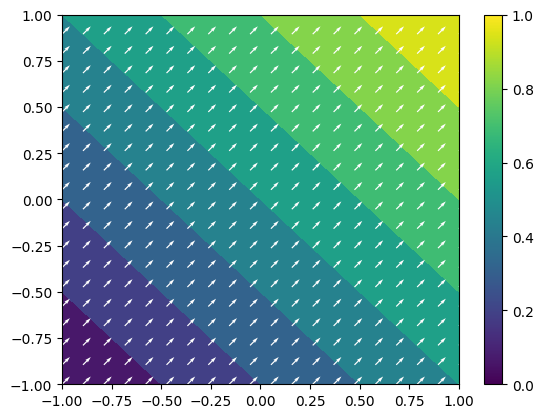

In [3]:
H = X1 + X2 - 1

UH = 1
VH = 1

plt.contourf(X1, X2, H)
plt.quiver(X1, X2, UH, VH, color='w', headlength=5)
plt.colorbar()

plt.show()

We can consider only points where the constraint is satisfied (i.e. $h(x_1,x_2)=0$):

$\displaystyle x_1 + x_2 - 1 = 0 \quad \rightarrow \quad x_2 = 1 - x_1$
 
In the graph, we can plot that line on top of the contour plot with also the gradients of the constraint and objective functions. We focus the plot near the line and we increase the gradient vector length to highlight some details: 

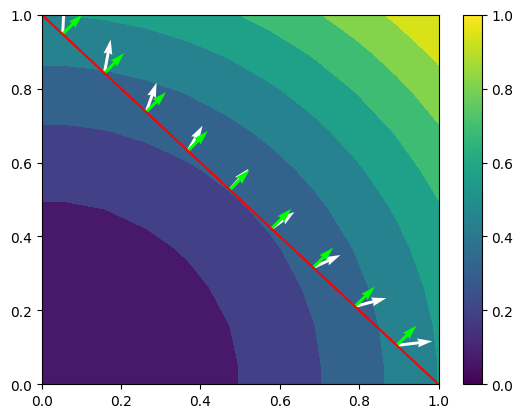

In [4]:
x2 = 1 - x1

uf = 2*x1
vf = 2*x2

ug = 1
vg = 1

plt.contourf(X1, X2, F)
plt.quiver(x1, x2, uf, vf, scale = 20, color='white', headlength=5)
plt.quiver(x1, x2, ug, vg, scale = 20, color='lime', headlength=5)
plt.plot(x1, x2, color='r')
plt.colorbar()
plt.ylim([0, 1])
plt.xlim([0, 1])

plt.show()

We can find the minimum of the Langrangian:

$\displaystyle \mathcal{L}(x_1, x_2, \beta) = x_1^2 + x_2^2 + \beta(x_1 + x_2 - 1)$

$\displaystyle \nabla \mathcal{L}(x_1, x_2, \beta) = \begin{bmatrix} 2x_1 + \beta \\ 2x_2 + \beta \\ x_1+x_2-1 \end{bmatrix} = 0$

The solution is:

$\displaystyle x_1 = \frac{1}{2}, \quad x_2 = \frac{1}{2}, \quad \beta = -1$

Lagrange Multipliers works as well with multiple equality constraints and inequality. In essence, we are just adding others boundary to the problem: 

$\displaystyle \Bigg \{ \begin{matrix} \min_{x} f(x) \hspace{100 pt}   \\
\text{s.t.} \quad g_i(x) \leq 0 \quad \text{for} \quad i=1,...,k \\
\hspace{15 pt} \quad h_i(x) = 0 \quad \text{for} \quad i=1,...,l \end{matrix}$

$\displaystyle \mathcal{L}(x, \alpha, \beta) = f(x) + \sum\limits_{i=1}^{k}{\alpha_i g_i(x)} + \sum\limits_{i=1}^{l}{\beta_i h_i(x)}$

Here, $\alpha_i$ and $\beta_i$ are the **Lagrange multipliers**, $\alpha_i \geq 0$ in order to take into account the inequality and the function $\mathcal{L}$ is called the **generalized Lagrangian**. 

in order to solve this problem, which is more general than the one we have seen before, we can consider two functions. The first is the **primal function** and it is defined as the maximum value of $\mathcal{L}$  over all possible choices of the multipliers:

$\displaystyle \theta_P(x) = \max_{\alpha, \beta: \alpha_i \geq 0} \mathcal{L}(x, \alpha, \beta)$  

The $P$ subscript stand for "primal".

Let some $x$ be given, if this value violates any of the constraints (i.e. $g_i(x)>0$ or $h_i(x) \neq 0$ for some $i$), then:

$\displaystyle \theta_P(x) = \infty$

because the Lagrangian becomes unbounded. Conversely, if the constraints are satisfied for the particular value of $w$, then

$\displaystyle \theta_P(x) = f(x)$

Hence $\theta_P$ takes the same value as the objective function for all values that satisfies the constraints and it is infinity if the constraints are violated:

$\displaystyle \theta_P(x) = \Bigg \{ \begin{matrix} f(x) \quad \text{if x satisfies constraints} \\ \infty \hspace{80 pt} \text{otherwise}  \end{matrix}$

So we can consider the minimization problem:

$\displaystyle \min_{x} \theta_P(x) = \min_{x} \max_{\alpha, \beta: \alpha_i \geq 0} \mathcal{L}(x, \alpha, \beta)$

which is the same of our optimization problem (i.e. has the sme solutions). We define the optimal value $p^*$ as the **value of the primal problem**:

Now  we consider also this problem:

$\displaystyle \theta_D(\alpha, \beta) = \min_{x} \mathcal{L}(x, \alpha, \beta)$

where $D$ subscript stans for "dual" and we can pose the **dual optimization problem**:

$\displaystyle \max_{\alpha, \beta: \alpha_i \geq 0} \theta_D(\alpha, \beta) = \max_{\alpha, \beta: \alpha_i \geq 0} \min_{x} \mathcal{L}(x, \alpha, \beta)$

We define the optimal value $d^+$ of the dual problem as the **value of the dual problem**.

Notice that the dual problem is the same as the primal problem, but **with the order of the min and max interchanged** and we can use relate the two problems using the property that the "max min" is always less than or equal to the "min max", so:

$\displaystyle d^* = \max_{\alpha, \beta: \alpha_i \geq 0} \min_{x} \mathcal{L}(x, \alpha, \beta) \leq \min_{x} \max_{\alpha, \beta: \alpha_i \geq 0} \mathcal{L}(x, \alpha, \beta) = p^*$

However, under some conditions (**Slaters condition**), the two problems have the same solution:

$\displaystyle d^* = p^*$

These conditions are: 

- $f$ and $g_i$ are convex
- $h_i$ are linear
- $g_i$ are (strictly) feasible (exist a point the satisfies all inequality constraints)

In that case exists $x^*$, $\alpha^*$ and $\beta^*$ so that $x^*$ is the solution of the primal problem, $\alpha^*, \beta^*$ are the solution of the dual problem and $d^* = p^*$ and we can solve the dual problem (which is in general easier to solve, as in SVM) instead of the primal problem. 

## Optimal margin classifier

We can apply the Lagrangian methods to the SMV optimization problem:

$\displaystyle \Bigg \{ \begin{matrix} \min_{w,b} w^Tw \hspace{140 pt}   \\
\text{s.t.} \quad y^{(i)}(w^Tx^{(i)}+b) \geq 1 \quad \text{for} \quad i=1,...,m \end{matrix}$

we can write the constraints as:

$\displaystyle g_i(w) = -y^{(i)}(w^Tx^{(i)}+b) + 1 \geq 0 \quad \text{for} \quad i=1,...,m$

We have one such constraint for each training example

and we can write the Lagrangian function:

$\displaystyle \mathcal{L}(w, b, \alpha) = w^Tw - \sum_{i=1}^{m} \alpha_i[y^{(i)} (w^Tx^{(i)}+b)-1 ]$

Notice that we have only $\alpha_i$ and no $\beta_i$ multipliers, since the problem has only inequality constraints. Moreover, this formulation verifies the Slaters condition, so we can solve the dual problem instead of the primal problem.

Let' find the dual form of the problem. To get $\theta_D$, we need to minimize $\mathcal{L}$ with respect to $w$ and $b$. We can do this by taking the derivative of $\mathcal{L}$ with respect to $w$ and $b$ and setting them to zero:

$\displaystyle \nabla_w \mathcal{L}(w, b, \alpha) = 2w - \sum_{i=1}^{m} \alpha_i y^{(i)}x^{(i)} = 0$

$\displaystyle \nabla_b \mathcal{L}(w, b, \alpha) = -\sum_{i=1}^{m} \alpha_i y^{(i)} = 0$

Solving for $w$ and $b$:

$\displaystyle w = \frac{1}{2} \sum_{i=1}^{m} \alpha_i y^{(i)}x^{(i)}$

$\displaystyle \sum_{i=1}^{m} \alpha_i y^{(i)} = 0$

We can plug the value of $w$ and back into the Lagrangian:
 

$\displaystyle \mathcal{L}\left(\frac{1}{2} \sum_{i=1}^{m} \alpha_i y^{(i)}x^{(i)}, b, \alpha\right) = \frac{1}{4} \sum_{i,j=1}^{m} \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T}x^{(j)} - \sum_{i=1}^{m} \alpha_i y^{(i)} \left(\frac{1}{2} \sum_{j=1}^{m} \alpha_j y^{(j)}x^{(j)}\right)^Tx^{(i)} - b \sum_{i=1}^{m} \alpha_i y^{(i)} + \sum_{i=1}^{m} \alpha_i = $

We can simplify the expression:

$\displaystyle = \frac{1}{4} \sum_{i,j=1}^{m} \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T}x^{(j)} - \frac{1}{2} \sum_{i,j=1}^{m} \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T}x^{(j)} - b \sum_{i=1}^{m} \alpha_i y^{(i)} + \sum_{i=1}^{m} \alpha_i =$

$\displaystyle = -\frac{1}{4} \sum_{i,j=1}^{m} \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T}x^{(j)} - b \sum_{i=1}^{m} \alpha_i y^{(i)} + \sum_{i=1}^{m} \alpha_i$

However the term $\sum_{i=1}^{m} \alpha_i y^{(i)} = 0$, so we can simplify the expression:

$\displaystyle = \sum_{i=1}^{m} \alpha_i -\frac{1}{4} \sum_{i,j=1}^{m} \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T}x^{(j)}$

so we obtain the following dual optimization problem:

$\displaystyle \Bigg \{ \begin{matrix} \max_{\alpha: \alpha_i \geq 0} \left(\sum_{i=1}^{m} \alpha_i -\frac{1}{4} \sum_{i,j=1}^{m} \alpha_i \alpha_j y^{(i)} y^{(j)} x^{(i)T}x^{(j)}\right) \\
\text{s.t.} \sum_{i=1}^{m} \alpha_i y^{(i)}=0 \hspace{140 pt} \end{matrix}$

We can solve it in order to get hte optimal values of the Lagrange multipliers $\alpha_i$. Once we have the optimal $\alpha_i$, we can compute the optimal $w$ and $b$:

$\displaystyle w = \frac{1}{2} \sum_{i=1}^{m} \alpha_i y^{(i)}x^{(i)}$

$\displaystyle b = y^{(i)} - w^Tx^{(i)}$

The optimal $w$ and $b$ can be used to make predictions for new data points. The prediction for a new point $x$ is:

$\displaystyle h_{w,b}(x) = \text{sign}(w^Tx+b)$

## Linear Classifier 

We can try this idea with the iris dataset considering the two class of versicolor and setosa:

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

In [6]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

The two classes can clearly be separated easily with a straight line (so they are linearly separable):

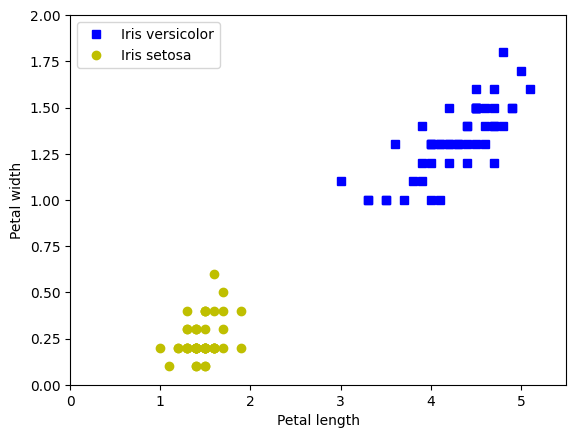

In [7]:
import matplotlib.pyplot as plt

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])

plt.show()

We can define some dividing line also by visual inspection, like:

In [8]:
import numpy as np

x0 = np.linspace(0, 5.5, 200)

pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

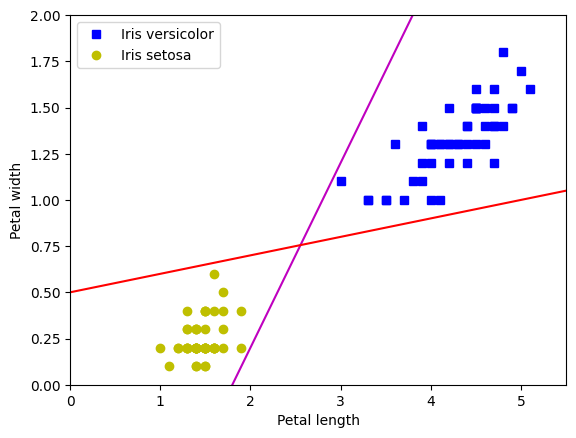

In [9]:
import matplotlib.pyplot as plt

plt.plot(x0, pred_2, "m-")
plt.plot(x0, pred_3, "r-")

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2])

plt.show()

The plot shows the decision boundaries of two possible linear classifiers, both working perfectly on this training set, but their decision boundaries come so close to the instances that they will probably not perform as well on new instances. We can use SMV to find the line that not only separates the two classes but also **stays as far away from the closest training instances as possible**.

In [10]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', C=10**9, probability=True)
svm_clf.fit(X, y)

SVC(C=1000000000, kernel='linear', probability=True)

In [11]:
def plot_svm_decision_boundary(svm_clf, xmin, xmax, xlable, ylabel):

    x = np.linspace(xmin, xmax, 200)

    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    decision_boundary = -w[0]/w[1] * x - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    
    plt.plot(x, decision_boundary, "k-")
    plt.plot(x, gutter_up, "k--")
    plt.plot(x, gutter_down, "k--")

    plt.xlabel(xlable)
    plt.ylabel(ylabel)

(0.0, 5.5, 0.0, 2.0)

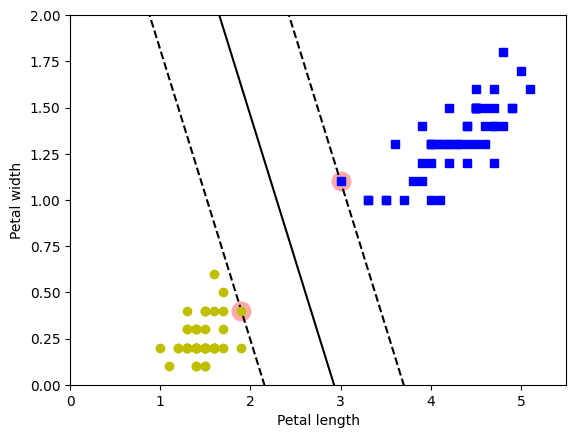

In [12]:
plot_svm_decision_boundary(svm_clf, 0, 5.5, "Petal length", "Petal width")

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.axis([0, 5.5, 0, 2])

Notice that adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or supported) by the  support vectors.

## Non-separable case

If we strictly impose that all instances must be "off the street" and on the right side, this is called **hard margin classification**. There is a major issue with this approach: **it only works if the data is linearly separable**. If we add just one additional outlier that makes th two classes not linearly separable, there is no possible hard margin:

In [13]:
X_outlier = np.array([[3.4, 1.3]])
y_outlier = np.array([0])

Xo = np.concatenate([X, X_outlier], axis=0)
yo = np.concatenate([y, y_outlier], axis=0)

In [14]:
svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(Xo, yo)

SVC(C=1000000000, kernel='linear')

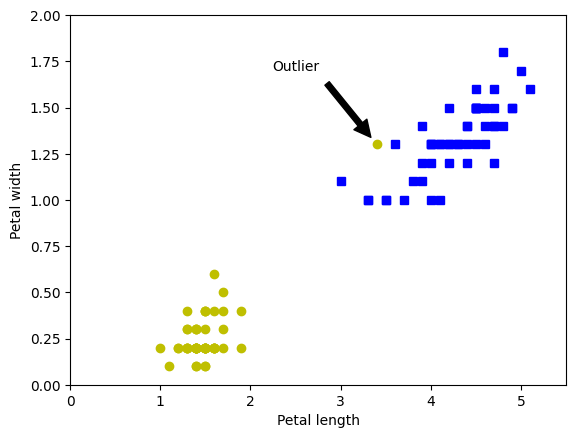

In [15]:
plt.plot(Xo[:, 0][yo==1], Xo[:, 1][yo==1], "bs")
plt.plot(Xo[:, 0][yo==0], Xo[:, 1][yo==0], "yo")

plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.annotate("Outlier",
             xy=(X_outlier[0][0], X_outlier[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([0, 5.5, 0, 2])

plt.show()

Moreover, it not clear if finding the separating hyperplane is what it is better to do, since  **it is sensitive to outliers**. For example, if we add an outlier inside the region, the decision boundary ends up very different and it will probably not generalize as well:

In [16]:
X_outlier = np.array([[3.2, 0.8]])
y_outlier = np.array([0])

Xo = np.concatenate([X, X_outlier], axis=0)
yo = np.concatenate([y, y_outlier], axis=0)

In [17]:
svm_clf = SVC(kernel="linear", C=10**9)
svm_clf.fit(Xo, yo)

SVC(C=1000000000, kernel='linear')

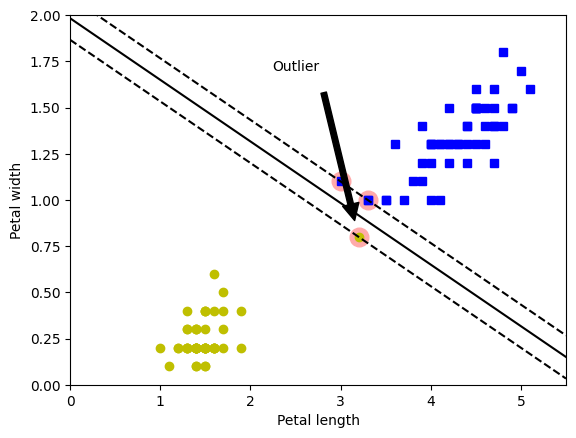

In [18]:
plt.plot(Xo[:, 0][yo==1], Xo[:, 1][yo==1], "bs")
plt.plot(Xo[:, 0][yo==0], Xo[:, 1][yo==0], "yo")

plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.annotate("Outlier",
             xy=(X_outlier[0][0], X_outlier[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.axis([0, 5.5, 0, 2])

plot_svm_decision_boundary(svm_clf, 0, 5.5, "Petal length", "Petal width")

plt.show()

We can use **a more flexible model** in order to make the algorithm work for non-linearly separable dataset as well as be less sensitive to outliers. We reformulate the optimization problem to get **soft margin objective**. We need to introduce a **slack variable $\zeta$** to measures **how much instances are allowed to violate the margin**. We now have two conflicting objectives: make the slack variables as small as possible (to reduce the margin violations), and make the margin as big as possible. Let's reformulate the problem with this idea:

$\displaystyle \Bigg \{ \begin{matrix} \min_{w,b} w^Tw + C \sum\limits_{i=1}^{m}{\zeta_i}   \hspace{120 pt}   \\
\text{s.t.} \quad y^{(i)}(w^Tx^{(i)}+b) \geq 1 - \zeta_i \quad \text{for} \quad i=1,...,m \\
\zeta_i \geq 0 \quad \text{for} \quad i=1,...,m \hspace{100 pt} \end{matrix}$

The parameter C controls the relative weighting between the two goals. Reducing C makes the street larger, but it also leads to more margin violations, however this results in more instances "supporting" the street, so there’s less risk of overfitting. But if we reduce it too much, then the model ends up underfitting.

As before, the problem can be solved using the Lagrange method. In particular, the Lagrangian is:

$\displaystyle \mathcal{L}(w, b, \zeta, \alpha, \mu) = w^Tw + C \sum\limits_{i=1}^{m}{\zeta_i} - \sum\limits_{i=1}^{m}{\alpha_i[y^{(i)}(w^Tx^{(i)}+b) - 1 + \zeta_i]} - \sum\limits_{i=1}^{m}{\mu_i \zeta_i}$

where $\alpha_i$ and $\mu_i$ are the Lagrange multipliers.

This is called **soft margin classification**.

## Soft Margin Classification

Let's try this idea again with the Iris dataset and different value of the C hyperparameter:

In [19]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # iris virginica

In [20]:
svm_clf1 = SVC(kernel="linear", C=1)
svm_clf1.fit(X, y)

SVC(C=1, kernel='linear')

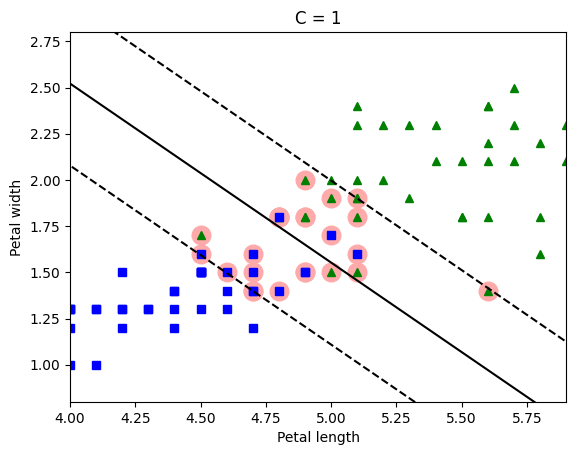

In [21]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.title("C = {}".format(svm_clf1.C))
plt.axis([4, 5.9, 0.8, 2.8])
plot_svm_decision_boundary(svm_clf1, 0, 8, "Petal length", "Petal width")

In [22]:
svm_clf2 = SVC(kernel="linear", C=100)
svm_clf2.fit(X, y)

SVC(C=100, kernel='linear')

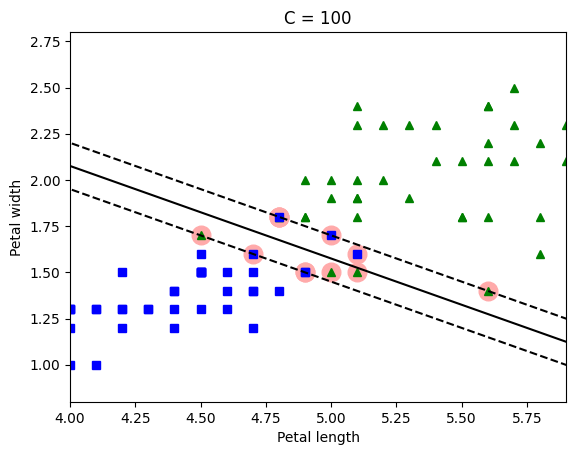

In [23]:
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.title("C = {}".format(svm_clf2.C))
plt.axis([4, 5.9, 0.8, 2.8])
plot_svm_decision_boundary(svm_clf2, 0, 8, "Petal length", "Petal width")

## Nonlinear Classification

Although linear SVM classifiers are efficient and often work surprisingly well, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features, in some cases this can result in a linearly separable dataset. As an example, consider a simple dataset with just one feature, but not linearly separable: 

In [24]:
X_simple = np.linspace(-4, 4, 9).reshape(-1, 1)
y_simple = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

(-4.5, 4.5, -0.2, 0.2)

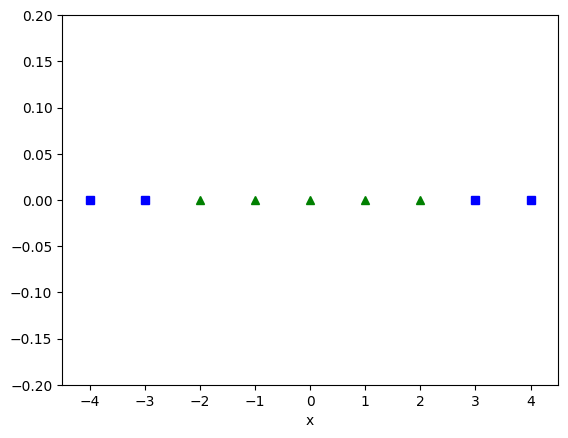

In [25]:
plt.plot(X_simple[:, 0][y_simple==0], np.zeros(4), "bs")
plt.plot(X_simple[:, 0][y_simple==1], np.zeros(5), "g^")

plt.xlabel("x")
plt.axis([-4.5, 4.5, -0.2, 0.2])

If we add a second feature (squaring the first one), the resulting 2D dataset perfectly linearly separable:

In [26]:
X_simple_2 = np.c_[X_simple, X_simple**2]

(-4.5, 4.5, -1.0, 17.0)

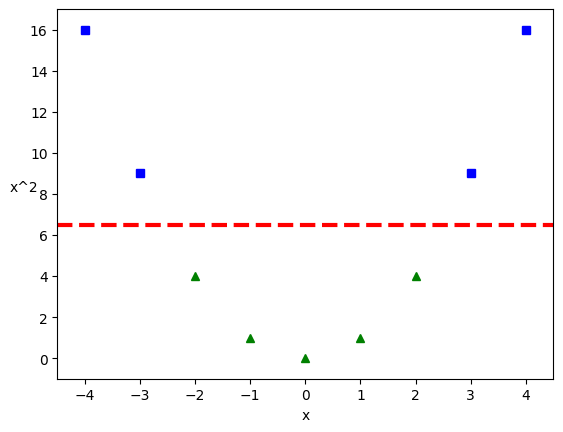

In [27]:
plt.plot(X_simple_2[:, 0][y_simple==0], X_simple_2[:, 1][y_simple==0], "bs")
plt.plot(X_simple_2[:, 0][y_simple==1], X_simple_2[:, 1][y_simple==1], "g^")

plt.xlabel("x")
plt.ylabel("x^2", rotation=0)

plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

### Polynomial Kernel

Adding polynomial features is simple to implement and can work great with all sorts of machine learning algorithms (not just SVMs). That said, at a low polynomial degree this method cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow. Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the **kernel trick**, that makes it possible to get the same result as if we added many polynomial features, even with a very high degree, without actually having to add them. This means there’s no combinatorial explosion of the number of features. Let’s test it on the moons dataset:

In [28]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [30]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel("x1")
    plt.ylabel("x2", rotation=0)

In [31]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

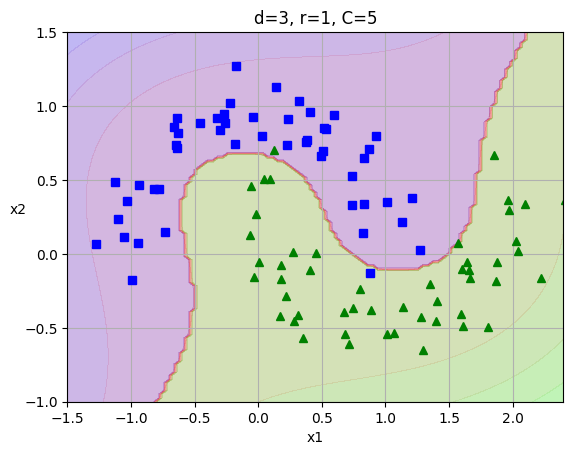

In [32]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.4, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("d=3, r=1, C=5")
plt.show()

The previous code trains a SVM classifier using the polynomial kernel with 3th-degree. If the model is overfitting, we can reduce the polynomial degree, conversely, if it is underfitting, we can try increasing it. The hyperparameter coef0 controls how much the model is influenced by high-degree terms versus
low-degree terms.

### Gaussian RBF Kernel

Another technique to tackle nonlinear problems is to **add features computed using a similarity function**, which measures how much each instance resembles **a particular landmark**. As similarity function we can use the **Gaussian Radial Basis Function (RBF)**, a bell-shaped function varying from 0 (very far away from the landmark) to 1 (at the landmark) controlled by the hyperparameter $\gamma$:

$\phi_\gamma(x,l)= e^{(-\gamma \left\|x-l\right\|^2)}$ 


In [33]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

For example, let’s consider again the a simple 1D non separable dataset, add two landmarks and show the distance of the instances from these landmarks:

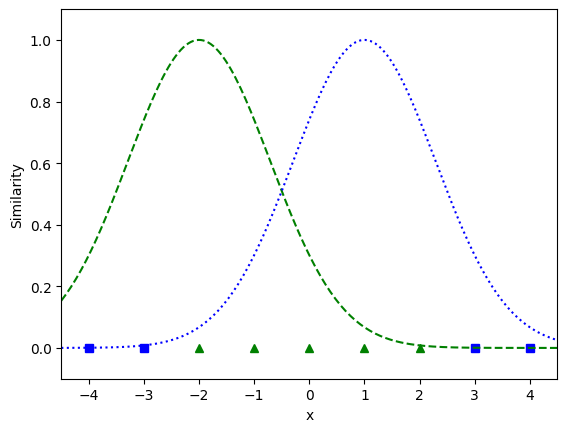

In [34]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

plt.plot(X_simple[:, 0][y_simple==0], np.zeros(4), "bs")
plt.plot(X_simple[:, 0][y_simple==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")

plt.xlabel("x")
plt.ylabel("Similarity")

plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.show()

Now we are ready to compute the new features. We consider for each sample the distance from each landmarks and we add a new feature calculated using the similarity function. Then we can plot the transformed dataset (dropping the original features), which is now linearly separable.

In [35]:
XK = np.c_[gaussian_rbf(X_simple, -2, gamma), gaussian_rbf(X_simple, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

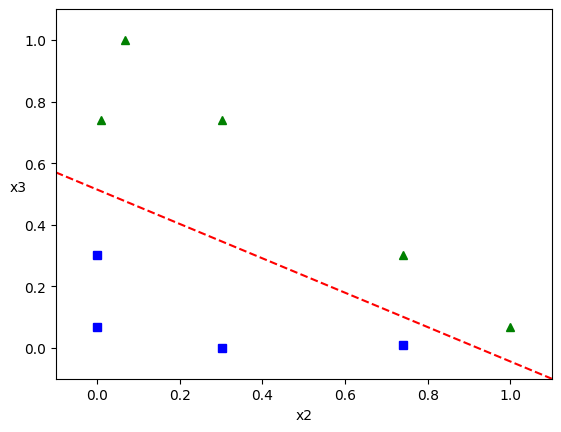

In [36]:
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")

plt.xlabel("x2")
plt.ylabel("x3", rotation=0)

plt.plot([-0.1, 1.1], [0.57, -0.1], "r--")
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.show()

**But how we can to select the landmarks?** The simplest approach is to create **a landmark at the location of each instance** in the dataset. Doing that creates many dimensions and increases the chances that the transformed training set will be linearly separable. The downside is that a training set with $m$ instances and $n$ features gets transformed into a training set with $m$ instances and $m$ features (assuming we drop the original features). If our training set is very large, we end up with an equally large number of features. 

Just like the polynomial features method, the similarity features method can be useful with any machine learning algorithm, but it may be computationally expensive to compute all the additional features (especially on large training sets). Once again **the kernel trick does its SVM magic**, making it possible to obtain a similar result as if you had added many similarity features, but without actually doing so. Let’s try the SVM class with the Gaussian RBF kernel on the moon dataset:

In [37]:
rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

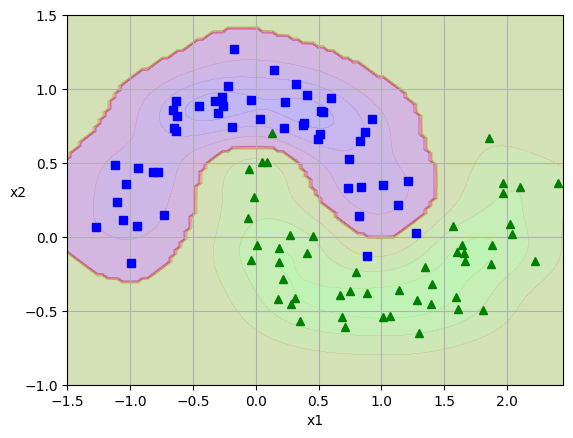

In [38]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

plt.show()

We can modify the hyperparameter $\gamma$ to obtain different results. Increasing $\gamma$ makes the bell-shaped curve narrower, so each instance’s range of influence is smaller and the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small $\gamma$ value makes the bellshaped curve wider, instances have a larger range of influence, and the decision boundary ends up smoother. So it acts like a regularization hyperparameter. If a model is overfitting, we should reduce it; if it is underfitting, we should increase it (similar to the C hyperparameter).

In [39]:
gamma_values = 0.1, 1, 10, 100

svm_clfs = []

for gamma in gamma_values:
    rbf_kernel_svm_clf = Pipeline([("scaler", StandardScaler()),
                                   ("svm_clf", SVC(kernel="rbf", gamma=gamma))])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

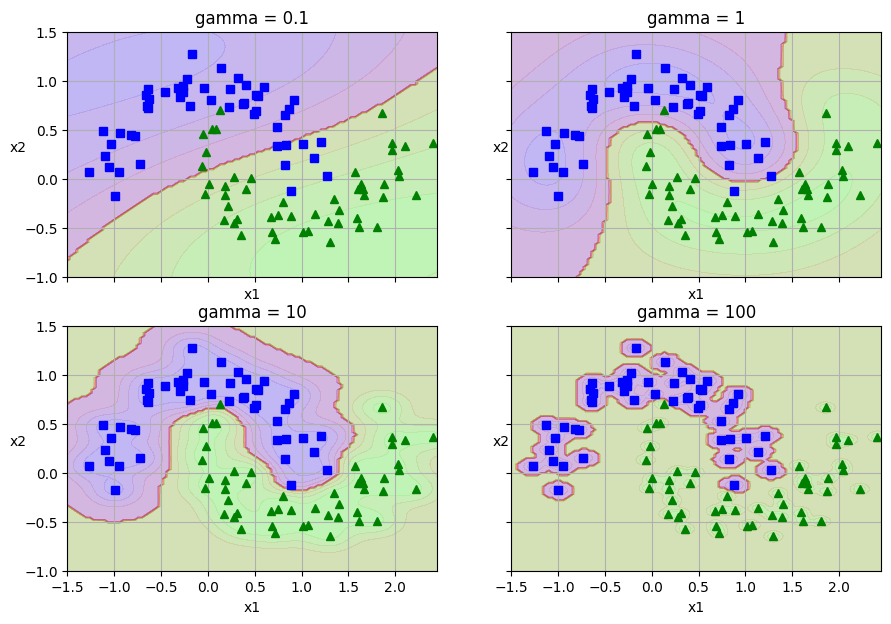

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma = gamma_values[i]
    plt.title("gamma = {}".format(gamma))

plt.show()

Other kernels exist but are used much more rarely. Some kernels are specialized for specific data structures. String kernels are sometimes used when classifying text documents or DNA sequences (e.g., using the string subsequence kernel or kernels based on the **Levenshtein distance**).

In SKLearni we have two classes: LinearSVC is based on the **liblinear library** and implements an optimized algorithm for linear SVM, but it does not support the kernel trick, but it scales almost linearly with the number of training instances and the number of features. Its training time complexity is roughly $O(m \times n)$. The SVC class is based on the **libsvm library**, which implements an algorithm that supports the kernel trick. The training time complexity is usually between $O(m^2 \times n)$ and $O(m^3 \times n)$. Unfortunately, this means that it gets dreadfully slow when the number of training instances gets large.

## Regression

SVM algorithm is versatile, it also supports linear and nonlinear regression. To use SVMs for regression, the trick is to **tweak the objective**: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM regression tries **to fit as many
instances as possible on the street**, while limiting margin violations (i.e., instances off the street). The width of the street is controlled by a hyperparameter, $\epsilon$. 

![](images/svm-regression.png)

We can train two linear SVM regressor trained on some random linear data, one with a large margin and the other with a small margin:

In [41]:
m = 50

X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [42]:
from sklearn.svm import LinearSVR

svm_reg_1 = LinearSVR(epsilon=1.5, dual=True, random_state=42)
svm_reg_1.fit(X, y)

LinearSVR(dual=True, epsilon=1.5, random_state=42)

In [43]:
svm_reg_2 = LinearSVR(epsilon=0.5, dual=True, random_state=42)
svm_reg_2.fit(X, y)

LinearSVR(dual=True, epsilon=0.5, random_state=42)

In [44]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    
    plt.plot(x1s, y_pred, "k-", label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    
    plt.plot(X, y, "bo")
    
    plt.xlabel(r"x")
    plt.axis(axes)

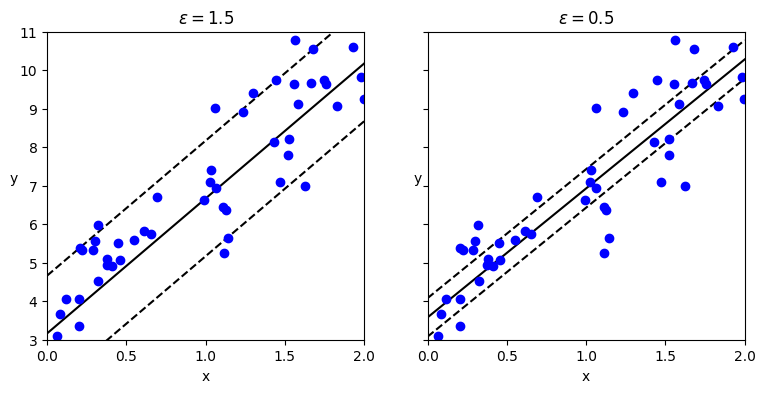

In [45]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(axes[0])
plot_svm_regression(svm_reg_1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_1.epsilon))
plt.ylabel("y", rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_reg_2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_2.epsilon))
plt.ylabel("y", rotation=0)

plt.show()

To tackle nonlinear regression tasks, we can use a kernelized SVM model. We can try on  a random quadratic training set, using a second-degree polynomial kernel:

In [46]:
m = 100

X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [47]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

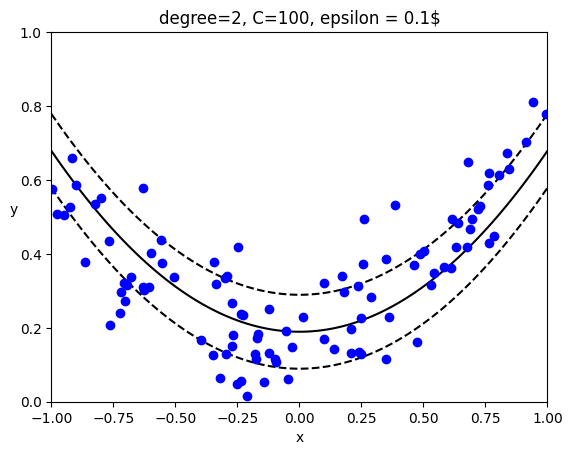

In [48]:
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title("degree={}, C={}, epsilon = {}$".format(svm_poly_reg.degree, svm_poly_reg.C, svm_poly_reg.epsilon))
plt.ylabel("y", rotation=0)

plt.show()

## Exercise

**1 - Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?**

First, let's load the dataset and split it into a training set and a test set.

In [49]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

Let's start simple, with a linear SVM classifier. It will automatically use the One-vs-All strategy, so there's nothing special we need to do. Easy!

In [50]:
from sklearn.svm import LinearSVC

lin_clf = LinearSVC(dual='auto', random_state=42)
lin_clf.fit(X_train, y_train)

LinearSVC(dual='auto', random_state=42)

Let's make predictions on the training set and measure the accuracy:

In [51]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)

0.9277333333333333

This is pretty bad. This linear model is certainly too simple for MNIST, but perhaps we just needed to scale the data first:

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

In [53]:
lin_clf = LinearSVC(dual='auto', random_state=42)
lin_clf.fit(X_train_scaled, y_train)

/Users/riccardo.berta/miniconda3/envs/machine-learning/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual='auto', random_state=42)

In [54]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9275166666666667

That's much better, but still not great at all for MNIST. If we want to use an SVM, we will have to use a kernel. Let's try an SVM with an RBF kernel with a reduce training set to speed up the process:

In [55]:
svm_clf = SVC(gamma="scale")
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC()

In [56]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9455333333333333

That's promising, we get better performance even though we trained the model on 6 times less data. Let's tune the hyperparameters by doing a randomized search with cross validation. We will do this on a small dataset just to speed up the process:

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=1, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17f82f450>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2a9cb9610>},
                   verbose=1)

In [61]:
rnd_search_cv.best_estimator_

SVC(C=2.0548683688153613, gamma=0.0016267220440028124)

In [62]:
rnd_search_cv.best_score_

0.8559937182691674

This looks pretty low but remember we only trained the model on a subset of instances. Let's retrain the best estimator on the whole training set:

In [63]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=2.0548683688153613, gamma=0.0016267220440028124)

In [64]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9944833333333334

Ah, this looks good! Let's select this model. Now we can test it on the test set:

In [ ]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9713

Not too bad, but apparently the model is overfitting slightly. It's tempting to tweak the hyperparameters a bit more (e.g. decreasing C and/or gamma), but we would run the risk of overfitting the test set. Other people have found that the hyperparameters C=5 and gamma=0.005 yield even better performance (over 98% accuracy). By running the randomized search for longer and on a larger part of the training set, we may be able to find this as well.